In [1]:
!pip freeze | grep scikit-learn

scikit-learn @ file:///home/conda/feedstock_root/build_artifacts/scikit-learn_1679675836718/work


In [2]:
import pickle
import pandas as pd

In [3]:
import numpy as np

In [9]:
import seaborn as sns

In [4]:
with open('model.bin', 'rb') as f_in:
    dv, model = pickle.load(f_in)

In [5]:
categorical = ['PULocationID', 'DOLocationID']

def read_data(filename):
    df = pd.read_parquet(filename)
    
    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df['duration'] = df.duration.dt.total_seconds() / 60

    df = df[(df.duration >= 1) & (df.duration <= 60)].copy()

    df[categorical] = df[categorical].fillna(-1).astype('int').astype('str')
    
    return df

In [6]:
df = read_data('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-02.parquet')

In [7]:
dicts = df[categorical].to_dict(orient='records')
X_val = dv.transform(dicts)
y_pred = model.predict(X_val)

# Q1: Standard deviation of predicted durations

In [8]:
np.std(y_pred)

5.28140357655334

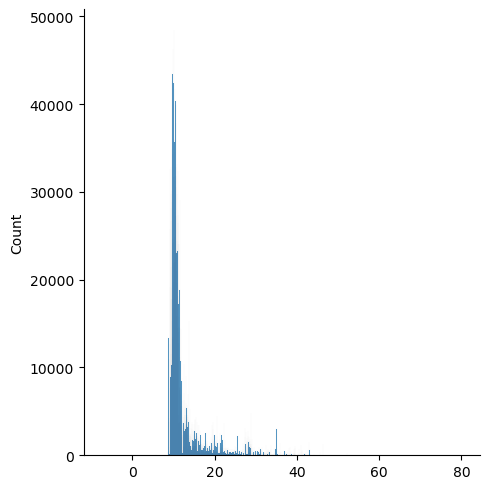

In [10]:
sns.displot(y_pred)